# Introduction to Machine Learning
## Lecture 3 - Clustering
### Notebook 3: Color Image Quantization Using Clustering
Prapared by: Said Bolluk

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

Import an image

In [2]:
# Load the flowor image
hummingbird = cv2.imread("hummingbird.jpg")

Print the original image

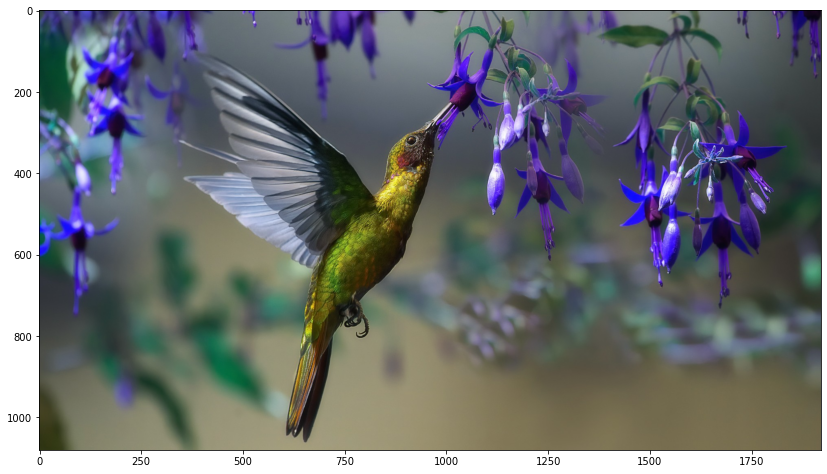

In [3]:
plt.figure(figsize=(14, 10))
plt.imshow(hummingbird)
plt.show()

In [4]:
hummingbird.shape

(1080, 1920, 3)

Let us check the first entry in each color matrix. This is the value in the first row and column of each color matrix: basically the upper-left pixel.

In [5]:
hummingbird[0, 0]

array([44, 63, 60], dtype=uint8)

Resize the image for simplicity

In [6]:
resized_bird = cv2.resize(hummingbird, (288, 162))

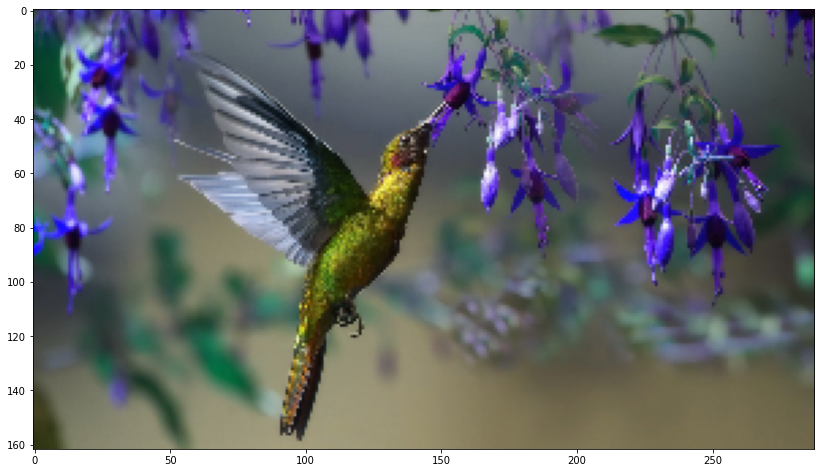

In [7]:
plt.figure(figsize=(14, 10))
plt.imshow(resized_bird)
plt.show()

Transform the image into a tabular matrix form: **Flattening**. This way we can combine all the color channels (red, green, and blue) and present our data as a 2D matrix. In this matrix, color channels will be the columns and the heights and widths will be the rows of the matrix. 

In [8]:
#bird = np.array(resized_bird, dtype=np.float64) / 255
bird = np.array(resized_bird, dtype=np.float64)

# Load Image and transform to a 2D numpy array.
height, width, channel = original_shape = tuple(bird.shape)

image_array = np.reshape(bird, (height * width, channel))
print(image_array.shape)

(46656, 3)


## K-Means Clustering

Define a function that implements color quantization to the image using different number of clusters.

In [9]:
def cluster(n_clusters):

    image_list = list()
    silhouette_coeffients_hummingbird = list()
    wcss_metric_hummingbird = list()

    for n in n_clusters:

        n_colors = n
        k_means = KMeans(n_clusters=n_colors, random_state=42)

        k_means.fit(image_array)

        centers = k_means.cluster_centers_
        labels = k_means.labels_

        # Converting data into 8-bit values
        centers = np.uint8(centers)
        #Re-assigning each pixel value as the closest cluster center to it:
        segmented_data = centers[labels.flatten()]

        # Reshaping data into the original image dimensions
        segmented_bird = segmented_data.reshape((resized_bird.shape))
        image_list.append(segmented_bird)
        
        # Clustering Evaluation Metrics
        
        # 1) Explained Variance (Silhouette Coefficients):
        score = silhouette_score(image_array, labels)
        silhouette_coeffients_hummingbird.append(score)
        
        # 2) Within Cluster Sum of Squares (WCSS):        
        wcss = k_means.inertia_
        wcss_metric_hummingbird.append(wcss)
        
    return image_list, silhouette_coeffients_hummingbird, wcss_metric_hummingbird

Get the results for different number of clusters using the predefined function: **cluster()**.

In [10]:
n_clusters = [2, 4, 8, 16, 32, 64, 128, 256]

image_list, sc, wcss = cluster(n_clusters)

# Model Evaluation

Plot images with different number of clusters

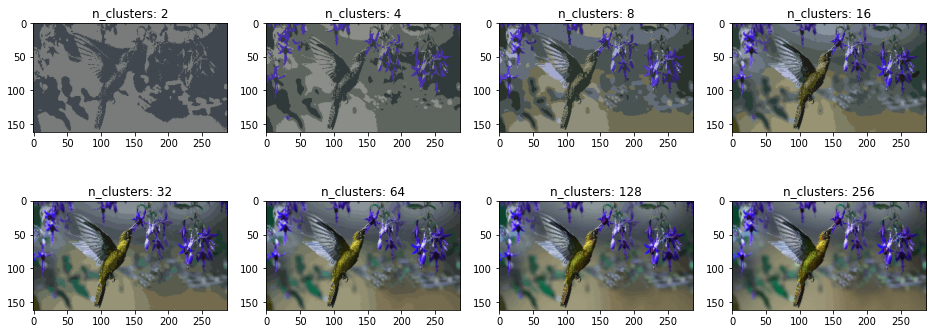

In [11]:
fig, ax = plt.subplots(2, 4, figsize=(16, 6))
# ax[0, 0]: n_clusters=2
ax[0, 0].imshow(image_list[0])   
ax[0, 0].set_title(f"n_clusters: {n_clusters[0]}")
# ax[0, 1]: n_clusters=4
ax[0, 1].imshow(image_list[1])   
ax[0, 1].set_title(f"n_clusters: {n_clusters[1]}")
# ax[0, 2]: n_clusters=8
ax[0, 2].imshow(image_list[2])   
ax[0, 2].set_title(f"n_clusters: {n_clusters[2]}")
# ax[0, 3]: n_clusters=16
ax[0, 3].imshow(image_list[3])   
ax[0, 3].set_title(f"n_clusters: {n_clusters[3]}")
# ax[1, 0]: n_clusters=32
ax[1, 0].imshow(image_list[4])   
ax[1, 0].set_title(f"n_clusters: {n_clusters[4]}")
# ax[1, 1]: n_clusters=64
ax[1, 1].imshow(image_list[5])   
ax[1, 1].set_title(f"n_clusters: {n_clusters[5]}")
# ax[1, 2]: n_clusters=128
ax[1, 2].imshow(image_list[6])   
ax[1, 2].set_title(f"n_clusters: {n_clusters[6]}")
# ax[1, 3]: n_clusters=256
ax[1, 3].imshow(image_list[7])   
ax[1, 3].set_title(f"n_clusters: {n_clusters[7]}")

plt.show()

(1) Visualize the efficiency/density of clustering using **Silhoutte Coefficient**

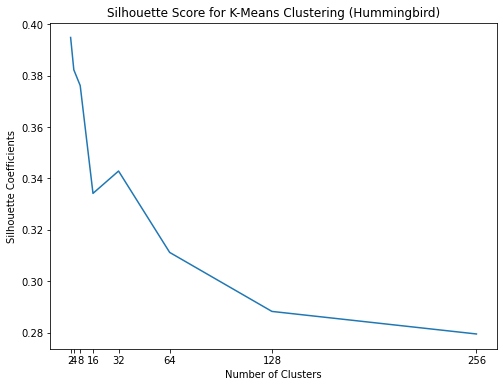

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(n_clusters, sc)
plt.xticks(n_clusters)
plt.title("Silhouette Score for K-Means Clustering (Hummingbird)")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficients")
plt.show()

(2) Plot the elbow point graph to determine the optimal number of clusters using **Within-Cluster Sum of Squares (WCSS)**

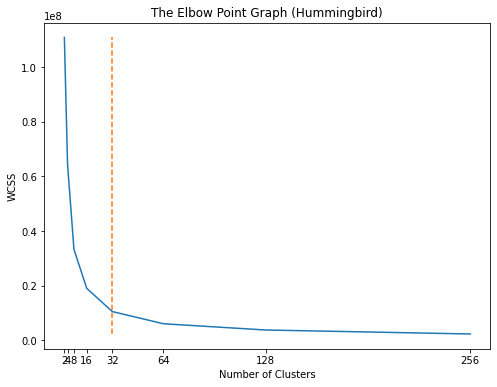

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(n_clusters, wcss)
plt.xticks(n_clusters)
plt.title("The Elbow Point Graph (Hummingbird)")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

# Mark the optimal point
a = [32, 32]
b = [np.min(wcss), np.max(wcss)]
plt.plot(a, b, linestyle="--")

plt.show()

In cases where the elbow point is unseeable from tha graph, we can use an existing library: **KneeLocator**.

In [14]:
from kneed import KneeLocator
kl = KneeLocator(n_clusters, wcss, curve="convex", direction="decreasing")
auto_elbow = kl.elbow
print("Elbow point:", auto_elbow)

Elbow point: 32


# Conclusion

Plot a final image using the optimal number of clusters: **n_cluster=32**

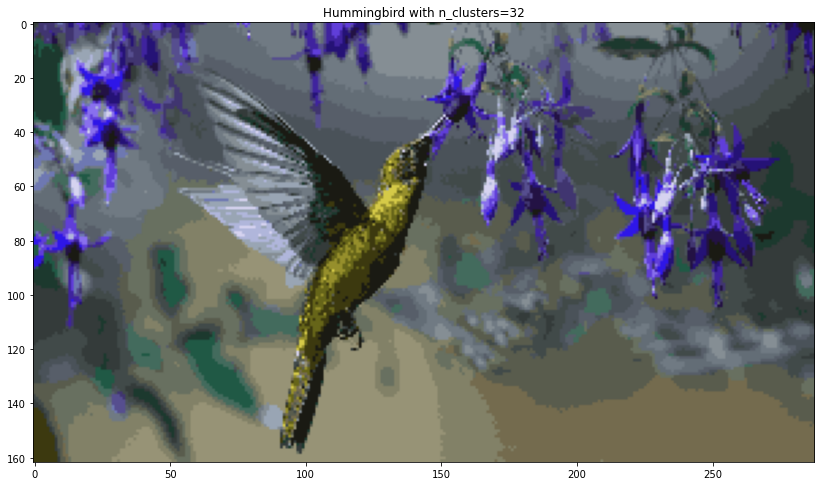

In [15]:
n_colors = 32
k_means = KMeans(n_clusters=n_colors, random_state=42)

k_means.fit(image_array)

centers = k_means.cluster_centers_
labels = k_means.labels_

# Converting data into 8-bit values
centers = np.uint8(centers)
#Re-assigning each pixel value as the closest cluster center to it:
segmented_data = centers[labels.flatten()]

# Reshaping data into the original image dimensions
segmented_bird = segmented_data.reshape((resized_bird.shape))
                                        
plt.figure(figsize=(14, 10))
plt.imshow(segmented_bird)
plt.title("Hummingbird with n_clusters=32")
plt.show()

# END